In [126]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [127]:
df = pd.read_csv("house price.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [128]:
df = df.dropna(subset=['Price', 'Area', 'Address'])

df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df = df[(df['Area'] > 20) & (df['Area'] < 1000)]

In [129]:
df = pd.get_dummies(df, columns=['Address'])

In [130]:
cdf = df[['Area','Room','Parking','Warehouse','Elevator','Price']+[col for col in df.columns if col.startswith('Address_')]]

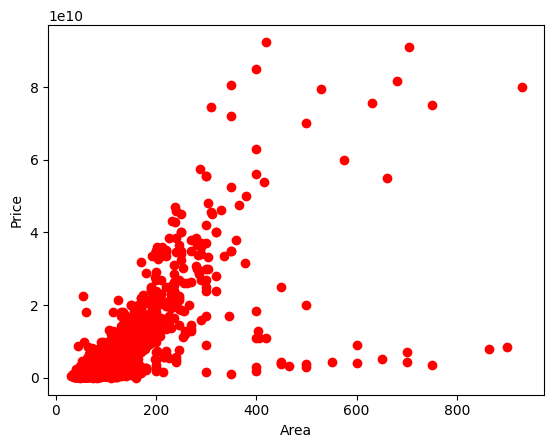

In [131]:
plt.scatter(cdf.Area, cdf.Price,  color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [132]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [133]:

x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator']+[col for col in df.columns if col.startswith('Address_')]])
y = np.asanyarray(train[['Price']])

#از اونجایی که قیمت دلار تو دیتابیس ثابته ، پس با تقسیم قیمت ،به 30000 میتوان قیمت به دلار هم پیشبینی کرد
regr = LinearRegression()
regr.fit(x, y)

print ('Coefficients: ', regr.coef_)


y_hat= regr.predict(test[['Area','Room','Parking','Warehouse','Elevator']+[col for col in df.columns if col.startswith('Address_')]])


print('r2 score: %.2f' % regr.score(x, y))

Coefficients:  [[ 7.77153200e+07 -8.90339838e+07 -3.78914838e+08  2.67648812e+07
  -2.30097259e+08  2.63316667e+09  6.95342107e+08 -3.25038110e+10
   3.99381329e+06 -1.05058706e+09  9.63630547e+07 -1.14437491e+09
   6.67861579e+09 -9.58190816e+08 -1.36359471e+09  3.62214866e+07
  -2.51446578e+09 -5.44944853e+08 -2.63130601e+09  8.14523996e+09
   1.73044000e+09  5.37152264e+09 -1.26005949e+09 -1.84134965e+09
   1.01289143e+08 -1.88066813e+08 -1.54056132e+09 -9.29266332e+08
   9.53674316e-07 -5.01286627e+08 -1.08293533e+09  6.35687243e+08
  -1.94117531e+09 -7.14649193e+09  2.19748811e+08  1.86310110e+09
  -1.07785883e+10  2.25314508e+09  9.94217867e+08  9.53674316e-06
  -1.72811247e+09 -8.39194185e+08  3.85976838e+09 -4.28840515e+08
   3.00170782e+09  4.30892438e+08  1.80436449e+08  1.62724628e+09
   2.90756817e+09  1.42218271e+10  6.57086281e+07 -5.29482736e+08
  -1.79688161e+09  6.09941256e+08 -2.45346998e+08  9.51348763e+09
  -7.57366577e+08  1.64963061e+08 -2.04369426e-05  2.81333923

c:\Users\Webhouse\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
